In [1]:
# http://holoviews.org/user_guide/Composing_Elements.html

In [1]:
require 'red-visualizer'

rdv = RdvMain.new(Rdv::Matplot.notebook)

#<RedVisualizer::Main:0x00007fe98569e3a0 @frontend=#<RedVisualizer::Matplot:0x00007fe98569e3c8 @plot=<module 'matplotlib.pyplot' from '/Users/youchan/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/pyplot.py'>>>

In [3]:
curve = rdv.curve do
  function {|x| Math.sin(x) }
  range x: 0..10, y: -1..1
end
nil

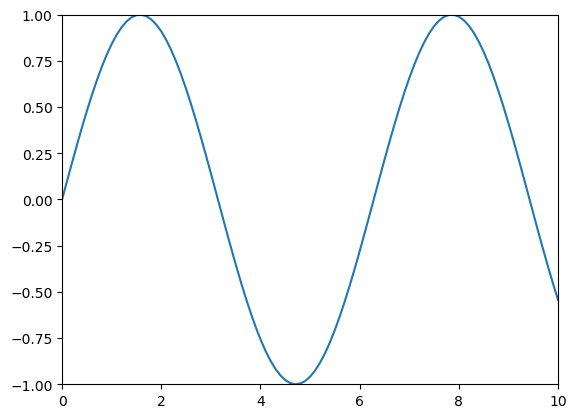

In [4]:
curve.render

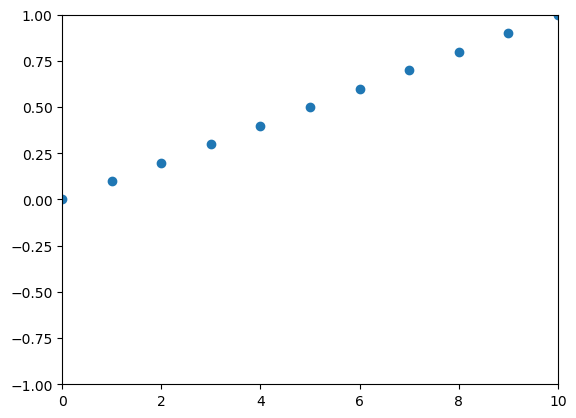

In [5]:
scatter = rdv.scatter do
  series (0..10).to_a, (0..1).step(0.1).to_a
  range x: 0..10, y: -1..1
end

scatter.render